In [ ]:
import pandas
import numpy
import matplotlib.pyplot as plt

In [ ]:
data = pandas.read_csv('/content/StudentStatistics.csv', sep=';')
data.head()

,RespNr,Location,OAA_ObjCourse,OAA_ObjClass,OAA_CourseExec,OAA_RelActObj,OAA_RelActExa,OAA_RelObjExa,OAA_LearProcAct,OAA_LearProcPrep,...,Mix_IntDiscus,Mix_IntPrep,Mix_IntExcel,Over_Grade,Gen_Gender,Gen_Age,Gen_SecSchool,Gen_Classes,Gen_NumberSubj,Gen_Time
0,1.0,Rotterdam,Fully Disagree,Fully Disagree,Fully Disagree,Disagree,Fully Disagree,Fully Disagree,Fully Disagree,Fully Disagree,...,Not at all,not so much,not so much,20.0,Female,22.0,NaN,NaN,Fully agree,20 < 30
1,2.0,Haarlem,Disagree,Disagree,NaN,Fully Disagree,Neither disagree nor agree,Agree,Disagree,Neither disagree nor agree,...,not so much,somewhat,somewhat,50.0,Male,NaN,The Netherlands,6.0,Disagree,10 < 20
2,3.0,Diemen,Fully agree,Fully agree,Agree,Fully agree,Fully agree,Fully agree,Fully agree,Agree,...,Very much,somewhat,somewhat,80.0,Male,37.0,Africa,7.0,Agree,10 < 20
3,4.0,Rotterdam,Fully Disagree,Neither disagree nor agree,Disagree,Neither disagree nor agree,Neither disagree nor agree,Fully Disagree,Fully Disagree,Neither disagree nor agree,...,NaN,neutral,neutral,15.0,Female,24.0,The Netherlands,6.0,Agree,10 < 20
4,5.0,Haarlem,Disagree,Agree,Fully Disagree,Neither disagree nor agree,Fully agree,Fully agree,Neither disagree nor agree,Fully agree,...,Not at all,somewhat,Very much,40.0,Male,19.0,The Netherlands,7.0,Fully agree,10 < 20


In [ ]:
pandas.crosstab(data['Location'], data['Mix_NrAct'])

Mix_NrAct,Enough,Far too little,Far too much,Too much,too little
Location,,,,,
Diemen,8,1,2,6,0
Haarlem,12,1,0,4,2
Rotterdam,7,0,0,5,3


In [ ]:
data['Mix_NrAct'].value_counts().index

Index(['Enough', 'Too much', 'too little', 'Far too little', 'Far too much'], dtype='object', name='Mix_NrAct')

In [ ]:
coding = {'Enough':2, 'Too much':3, 'too little':1, 'Far too little':0, 'Far too much':4}

!pip install https://raw.githubusercontent.com/stikpet/stikpetP/main/stikpetP.tar.gz
import stikpetP as ps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.6/253.6 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stikpetP: filename=stikpetP-0.0.3-py3-none-any.whl size=422074 sha256=5177622fd600bb9e6b6fcc76ccce3128b4bad91602931e03c4776092385ff1ac
  Stored in directory: /tmp/pip-ephem-wheel-cache-ozexrsv1/wheels/65/58/9c/d9a9e2185c9bb20de121369a2b0f5452a2a582c4b4df87e446
Successfully built stikpetP


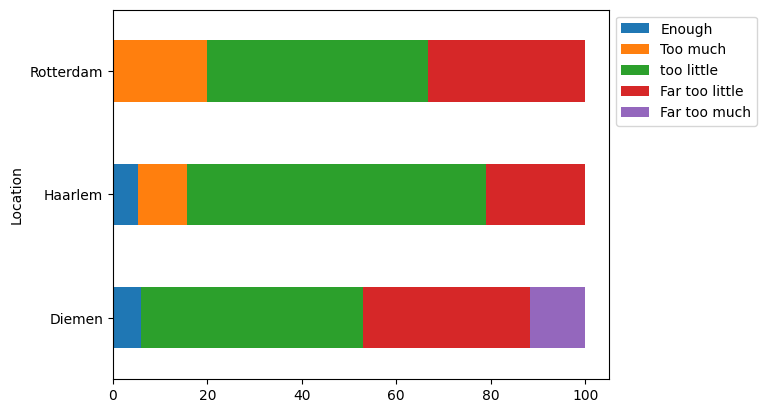

In [ ]:
ps.vi_bar_stacked_multiple(data['Location'], data['Mix_NrAct'], coding)

In [ ]:
from scipy.stats import kruskal
rotterdamScores = data['Mix_NrAct'][data['Location'] == 'Rotterdam'].dropna()
haarlemScores = data['Mix_NrAct'][data['Location'] == 'Haarlem'].dropna()
diemenScores = data['Mix_NrAct'][data['Location'] == 'Diemen'].dropna()

In [ ]:
rotterdamScores = rotterdamScores.replace(coding)
haarlemScores = haarlemScores.replace(coding)
diemenScores = diemenScores.replace(coding)

In [ ]:
kruskal(rotterdamScores, haarlemScores, diemenScores)

KruskalResult(statistic=3.335068971240797, pvalue=0.1887117641109804)

In [ ]:
pvalue=0.1887117641109804

In [ ]:
if pvalue < 0.05:
  print("H0 rejected")
else:
  print("H0 cannot be rejected")

H0 cannot be rejected


In [ ]:
#effect size - epsilon square

#X - nominal data - place of school
#y - ordinal data -  feeling of number of activities

#X has no influence on y

#test statistics
H = 3.335068971240797

#number of cases
n = pandas.crosstab(data['Location'], data['Mix_NrAct']).sum().sum()

print(H,n)

3.335068971240797 51


In [ ]:
esp = H * ((n + 1) / (n ** 2-1))
esp

0.06670137942481594

In [ ]:
if esp < 0.01:
  print('negligible')
elif esp < 0.04:
  print('weak')
elif esp < 0.16:
  print('moderate')
elif esp < 0.36:
  print('relatively strong')
elif esp < 0.64:
  print('strong')
else:
  print('very strong')

moderate


The kruskal wallis h test did not find any association/ influence/impact of place of school and feeling of activities (p=0.18).

Further the Epsilon square effect was moderate ( epsilon-squared=0.66)

No need to calculate effect size for non/in-signifiacnt results